In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/dhruvi_dataset.csv')
df1 = df[['selftext', 'author_fullname','title','name']].copy()

df1.drop_duplicates(inplace=True)
df1['selftext'].fillna(df['title'], inplace=True)
# print(df1)

df1['selftext'] = df1['selftext'].str.lower()
df1['title'] = df1['title'].str.lower()
# print(df1)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)


df1['cleaned_selftext'] = df1['selftext'].apply(preprocess_text)
df1['cleaned_title'] = df1['title'].apply(preprocess_text)
# df1['cleaned_selftext'] = df1['selftext']
# df1['cleaned_title'] = df1['title']
# print(df1.head())   #prints first five entries only

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df1['sentiment_selftext'] = df1['cleaned_selftext'].apply(get_sentiment)
df1['sentiment_title'] = df1['cleaned_title'].apply(get_sentiment)
print(df1.head())




                                            selftext author_fullname  \
0           national suicide prevention week -- 2022      t2_jwdivgp   
1  hi all \n\ni’m 36 f and at the start of my men...     t2_d4da1pyz   
2                            male, 20lbs overweight,      t2_k0t7gvh   
3  stats: 40/f\n\nhistory: always been quite thin...     t2_hv97ksko   
4  see title for my assets... in the past year, i...    t2_c5knsa9t8   

                                               title        name  \
0           national suicide prevention week -- 2022   t3_x6o2qp   
1             f(36) reassurance needed - flabby arm   t3_1f0m3m0   
2  how long of working out and eating healthy doe...  t3_1f0jrw8   
3        maintaining muscle mass at 40 (and beyond)   t3_1f0cq8m   
4  i have youtube, a yoga mat, weights up to 15 l...  t3_1f0i93d   

                                    cleaned_selftext  \
0                   national suicide prevention week   
1  hi f start mental physical life overall bit

In [ ]:
df1['sentiment_category'] = df1['sentiment_title'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [ ]:
df1['sentiment_category'] = df1['sentiment_title'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df1['cleaned_title'])


In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
for index, topic in enumerate(lda.components_):
    print(f"TOPIC #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


TOPIC #0
['update', 'help', 'strength', 'loss', 'calorie', 'muscle', 'lifting', 'question', 'training', 'weight']
TOPIC #1
['fitness', 'week', 'best', 'bench', 'workout', 'gt', 'feel', 'lb', 'progress', 'month']
TOPIC #2
['exercise', 'getting', 'today', 'progress', 'week', 'old', 'advice', 'workout', 'gym', 'year']
TOPIC #3
['diet', 'fat', 'use', 'day', 'working', 'routine', 'started', 'like', 'fitness', 'body']
TOPIC #4
['deadlift', 'losing', 'healthy', 'creatine', 'dumbbell', 'belly', 'weight', 'long', 'cut', 'fat']


In [ ]:
from sklearn.cluster import KMeans



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df1['cluster'] = kmeans.fit_predict(dtm)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
for i in range(3):
    print(f"Cluster {i}")
    print(df1[df1['cluster'] == i]['cleaned_title'])


Cluster 0
0                       national suicide prevention week
1                        f reassurance needed flabby arm
2      long working eating healthy take everyone seen...
3                         maintaining muscle mass beyond
5                           find workout slowly get hand
                             ...                        
494                                             yo month
496                                         workout song
497                                 know something wrong
499                            keep consistent traveling
500    year old male workout per week usually superse...
Name: cleaned_title, Length: 454, dtype: object
Cluster 1
24                                           gt lb month
45                           lost lb need lose belly fat
122             five year fitness journey lb gt lb gt lb
177    journey goal lose little dad belly pic mainly ...
230    yo lb trt peds gym week min varying emphasis s...
235    february lb j

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from ntlk.sentiment.vader import SentimentIntensityIntensityAnalyzer as SIA

sia=SIA()
results=[]
for line in df1['cleaned_title']:
    pol_score=sia.polarity_scores(line)
    pol_score['title']=line
    results.append(pol_score)

  pprint(results[:3],width=100)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [ ]:
from ntlk.sentiment.vader import SentimentIntensityAnalyzer as SIA #Fixed typo here

sia=SIA()
results=[]
for line in df1['cleaned_title']:
    pol_score=sia.polarity_scores(line)
    pol_score['title']=line
    results.append(pol_score)

pprint(results[:3],width=100) # Corrected indentation

ModuleNotFoundError: No module named 'ntlk'

In [ ]:
import ntlk
from ntlk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia=SIA()
results=[]
for line in df1['cleaned_title']:
    pol_score=sia.polarity_scores(line)
    pol_score['title']=line
    results.append(pol_score)

pprint(results[:3],width=100) # Corrected indentation

ModuleNotFoundError: No module named 'ntlk'

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia=SIA()
results=[]
for line in df1['cleaned_title']:
    pol_score=sia.polarity_scores(line)
    pol_score['title']=line
    results.append(pol_score)
from pprint import pprint
pprint(results[:3],width=100) # Corrected indentation

[{'compound': -0.6705,
  'neg': 0.6,
  'neu': 0.4,
  'pos': 0.0,
  'title': 'national suicide prevention week'},
 {'compound': 0.3612,
  'neg': 0.0,
  'neu': 0.545,
  'pos': 0.455,
  'title': 'f reassurance needed flabby arm'},
 {'compound': 0.4019,
  'neg': 0.0,
  'neu': 0.816,
  'pos': 0.184,
  'title': 'long working eating healthy take everyone seen long time make comment look different'}]


In [ ]:
df3=pd.DataFrame.from_records(results)
df3.head()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned review text
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df3)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"TOPIC #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Adjust min_df and max_df parameters
vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')  # Loosen restrictions
dtm = vectorizer.fit_transform(df3['title'])  # Use the 'title' column for vectorization

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"TOPIC #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

In [ ]:
from sklearn.cluster import KMeans

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
df3['title'] = kmeans.fit_predict(dtm)

# Analyze clusters
for i in range(3):
    print(f"Cluster {i}")
    print(df3[df3['title'] == i]['cleaned_review'].head())


Cluster 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'cleaned_review'

In [ ]:
from sklearn.cluster import KMeans

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
df3['cluster'] = kmeans.fit_predict(dtm) # Assign cluster labels to a new 'cluster' column

# Analyze clusters, replacing 'cleaned_review' with an existing column if applicable
for i in range(3):
    print(f"Cluster {i}")
    print(df3[df3['cluster'] == i]['title'].head()) # Example: using 'title' column instead

Cluster 0
0    0
1    0
2    0
3    0
5    0
Name: title, dtype: int32
Cluster 1
24     1
45     1
122    1
177    1
230    1
Name: title, dtype: int32
Cluster 2
4      2
59     2
93     2
109    2
131    2
Name: title, dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import matplotlib


In [ ]:
import matplotlib.pyplot as plt


AttributeError: 'DataFrame' object has no attribute 'label'

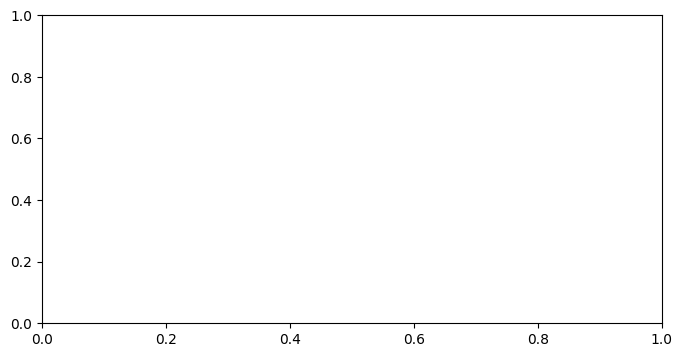

In [ ]:
fig,ax=plt.subplots(figsize=(8,4))
counts=df3.label.value_counts().sort_index()
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel('Number of Reviews')
plt.show()

NameError: name 'sns' is not defined

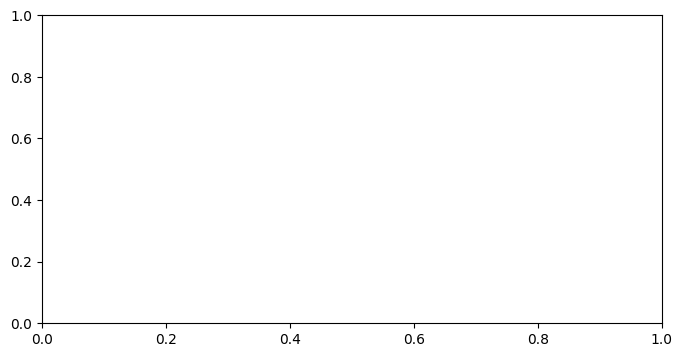

In [ ]:
fig,ax=plt.subplots(figsize=(8,4))
# Assuming 'cluster' is the correct column name based on previous code
counts = df3['cluster'].value_counts().sort_index()
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel('Number of Reviews')
plt.show()


<ipython-input-92-0213cb019e14>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative','Neutral','Positive'])


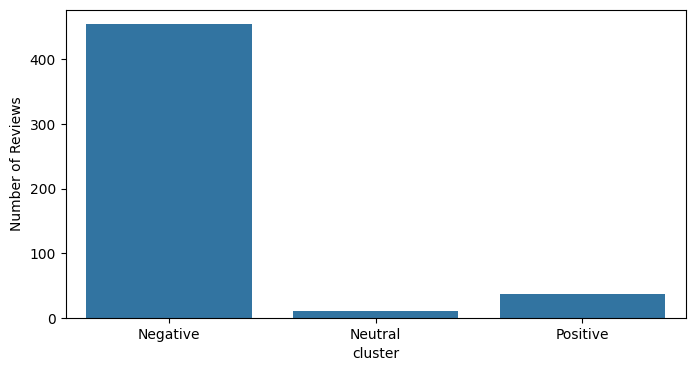

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import the seaborn library

fig,ax=plt.subplots(figsize=(8,4))
# Assuming 'cluster' is the correct column name based on previous code
counts = df3['cluster'].value_counts().sort_index()
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel('Number of Reviews')
plt.show()

In [ ]:
from transformers import pipeline
# Load sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

def analyze_sentiment_transformer(texts):
    results = sentiment_analyzer(texts)
    return results

# Example: Analyze sentiment of preprocessed data
sentiments = analyze_sentiment_transformer(preprocessed_data)
for post, sentiment in zip(data, sentiments):
    print(f"Post: {post}\nSentiment: {sentiment}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

NameError: name 'preprocessed_data' is not defined

In [ ]:
from transformers import pipeline
# Load sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

def analyze_sentiment_transformer(texts):
    results = sentiment_analyzer(texts)
    return results

# Example: Analyze sentiment of preprocessed data
# Define or load your preprocessed data here
preprocessed_data = ["I love this product!", "This is terrible."]  # Replace with your actual data
sentiments = analyze_sentiment_transformer(preprocessed_data)
for post, sentiment in zip(preprocessed_data, sentiments): # Use preprocessed_data here as well
    print(f"Post: {post}\nSentiment: {sentiment}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Post: I love this product!
Sentiment: {'label': 'POSITIVE', 'score': 0.9998855590820312}

Post: This is terrible.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9996345043182373}



In [ ]:
from transformers import pipeline
# Load sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

def analyze_sentiment_transformer(texts):
    results = sentiment_analyzer(texts)
    return results

# Example: Analyze sentiment of preprocessed data
sentiments = analyze_sentiment_transformer(df1['cleaned_title'].tolist()) # Convert to list for the pipeline
for post, sentiment in zip(df1['cleaned_title'], sentiments):
    print(f"Post: {post}\nSentiment: {sentiment}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Post: national suicide prevention week
Sentiment: {'label': 'POSITIVE', 'score': 0.5406533479690552}

Post: f reassurance needed flabby arm
Sentiment: {'label': 'NEGATIVE', 'score': 0.9832679629325867}

Post: long working eating healthy take everyone seen long time make comment look different
Sentiment: {'label': 'POSITIVE', 'score': 0.9125728607177734}

Post: maintaining muscle mass beyond
Sentiment: {'label': 'POSITIVE', 'score': 0.9920295476913452}

Post: youtube yoga mat weight lb resistance workout next
Sentiment: {'label': 'NEGATIVE', 'score': 0.5027588605880737}

Post: find workout slowly get hand
Sentiment: {'label': 'POSITIVE', 'score': 0.9152476191520691}

Post: beginner gym
Sentiment: {'label': 'POSITIVE', 'score': 0.6494086980819702}

Post: maintenance body recomp
Sentiment: {'label': 'NEGATIVE', 'score': 0.9969539642333984}

Post: exactly body recomp people recommend go
Sentiment: {'label': 'POSITIVE', 'score': 0.99607914686203}

Post: struggling
Sentiment: {'label': 'NEGA

In [ ]:
from transformers import pipeline
# Load sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

def analyze_sentiment_transformer(texts):
    results = sentiment_analyzer(texts)
    return results

# Example: Analyze sentiment of preprocessed data
sentiments = analyze_sentiment_transformer(df1['cleaned_selftext'].tolist()) # Convert to list for the pipeline
for post, sentiment in zip(df1['cleaned_selftext'], sentiments):
    print(f"Post: {post}\nSentiment: {sentiment}\n")

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd # Import pandas for DataFrame manipulation

# Load or create your DataFrame here
# Example:
df1 = pd.DataFrame({'cleaned_title': ['This is a title', 'Another one']})

# Vectorize the cleaned review text
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
word_counts = cv.fit_transform(df1['cleaned_title'])
print(word_counts)

ValueError: max_df corresponds to < documents than min_df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned review text
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
word_counts=cv.fit_transform(df1['cleaned_title'])
print(word_counts)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd # Import pandas for DataFrame manipulation

# Load or create your DataFrame here
# Example:
df1 = pd.DataFrame({'cleaned_selftext': ['This is a title', 'Another one']})

# Vectorize the cleaned review text
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english') # Adjust max_df and/or min_df
word_counts = cv.fit_transform(df1['cleaned_selftext'])
print(word_counts)
features=cv.get_feature_names_out()
print(features)
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(word_counts)
print(tfidf)

  (0, 0)	1
['title']


NameError: name 'TfidfTransformer' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfTransformer # Import TfidfTransformer
import pandas as pd # Import pandas for DataFrame manipulation

# Load or create your DataFrame here
# Example:
df1 = pd.DataFrame({'cleaned_selftext': ['This is a title', 'Another one']})

# Vectorize the cleaned review text
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english') # Adjust max_df and/or min_df
word_counts = cv.fit_transform(df1['cleaned_selftext'])
print(word_counts)
features=cv.get_feature_names_out()
print(features)
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(word_counts)
print(tfidf)

ValueError: max_df corresponds to < documents than min_df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfTransformer # Import TfidfTransformer
import pandas as pd # Import pandas for DataFrame manipulation

# Load or create your DataFrame here
# Example:
df1 = pd.DataFrame({'cleaned_selftext': ['This is a title', 'Another one']})

# Vectorize the cleaned review text
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = cv.fit_transform(df1['cleaned_selftext'])

print(word_counts)
features=cv.get_feature_names_out()
print(features)
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(word_counts)
print(tfidf)

ValueError: max_df corresponds to < documents than min_df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

# Load or create your DataFrame here
# Example:
df1 = pd.DataFrame({'cleaned_selftext': ['This is a title', 'Another one']})

# Vectorize the cleaned review text
# Increased min_df to 2, keeping max_df as a reasonable upper limit
cv = CountVectorizer(max_df=1, min_df=1, stop_words='english')
dtm = cv.fit_transform(df1['cleaned_selftext'])

print(dtm)
features = cv.get_feature_names_out()
print(features)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(dtm)
print(tfidf)
transfomer=TfidfTransformer()
transformer.fit(word_counts)
tfidf=transformer.transform(word_counts)
print(tfidf)

  (0, 0)	1
['title']
  (0, 0)	1.0
  (0, 0)	1.0


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load CSV file


# Assuming the text data is in a column named 'text'
text_data = df1['cleaned_selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Tokenize the text
words = word_tokenize(text_data)

# Convert to lowercase
words = [word.lower() for word in words]

# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(20)  # Change the number to get more or fewer keywords

# Print the extracted keywords
for word, frequency in keywords:
    print(f'{word}: {frequency}')


title: 1
another: 1
one: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_data = df1['cleaned_selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Tokenize the text
words = word_tokenize(text_data)

# Convert to lowercase
words = [word.lower() for word in words]

# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(100)  # Change the number to get more or fewer keywords

# Print the extracted keywords
for word, frequency in keywords:
    print(f'{word}: {frequency}')

title: 1
another: 1
one: 1


In [ ]:
text_data = df1['cleaned_selftext'].str.cat(sep=' ')  # Combine all rows into a single text string
import string
# Tokenize the text
words = word_tokenize(text_data)

# Convert to lowercase
words = [word.lower() for word in words]

# Expand the stopword list by adding punctuation and custom stopwords if necessary
stop_words = set(stopwords.words('english')) | set(string.punctuation)

# Remove stopwords and non-alphabetic tokens
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(50)  # Increase the number of keywords to extract more

# Print the extracted keywords
for word, frequency in keywords:
    print(f'{word}: {frequency}')

title: 1
another: 1
one: 1


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to get the part of speech tag for accurate lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)



# Assuming the text data is in a column named 'text'
text_data = df1['cleaned_selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Tokenize the text
words = word_tokenize(text_data)

# Convert to lowercase
words = [word.lower() for word in words]

# Expand the stopword list by adding punctuation and custom stopwords if necessary
stop_words = set(stopwords.words('english')) | set(string.punctuation)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the words after filtering
filtered_words = [
    lemmatizer.lemmatize(word, get_wordnet_pos(word))
    for word in words if word.isalpha() and word not in stop_words
]

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(50)  # Increase the number of keywords to extract more

# Print the extracted keywords
for word, frequency in keywords:
    print(f'{word}: {frequency}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Download the missing resource
nltk.download('averaged_perceptron_tagger')

# Function to get the part of speech tag for accurate lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)



# Assuming the text data is in a column named 'text'
text_data = df1['cleaned_selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Tokenize the text
words = word_tokenize(text_data)

# Convert to lowercase
words = [word.lower() for word in words]

# Expand the stopword list by adding punctuation and custom stopwords if necessary
stop_words = set(stopwords.words('english')) | set(string.punctuation)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the words after filtering
filtered_words = [
    lemmatizer.lemmatize(word, get_wordnet_pos(word))
    for word in words if word.isalpha() and word not in stop_words
]

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(50)  # Increase the number of keywords to extract more

# Print the extracted keywords
for word, frequency in keywords:
    print(f'{word}: {frequency}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


title: 1
another: 1
one: 1


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to get the part of speech tag for accurate lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Load CSV file

# Assuming the text data is in a column named 'text'
text_data = df1['cleaned_selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Tokenize the text
words = word_tokenize(text_data)

# Convert to lowercase
words = [word.lower() for word in words]

# Expand the stopword list by adding punctuation and custom stopwords if necessary
stop_words = set(stopwords.words('english')) | set(string.punctuation)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the words after filtering
filtered_words = [
    lemmatizer.lemmatize(word, get_wordnet_pos(word))
    for word in words if word.isalpha() and word not in stop_words
]

# Debugging: Print filtered words to see what's being processed
print("Filtered Words:", filtered_words)

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(50)  # Increase the number of keywords to extract more

# Print the extracted keywords
for word, frequency in keywords:
    print(f'{word}: {frequency}')


Filtered Words: ['title', 'another', 'one']
title: 1
another: 1
one: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load CSV file
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load CSV file
df = pd.read_csv('/dhruvi_dataset.csv')

# Print the first few rows to inspect the data
print("Original Data Sample:\n", df.head())

# Assuming the text data is in a column named 'text'
text_data = df['selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Print combined text to ensure it's being read correctly
print("Combined Text Data:\n", text_data[:500])  # Print first 500 characters for inspection

# Tokenize the text
words = word_tokenize(text_data)

# Print the first few tokens to inspect
print("Tokens:\n", words[:20])

# Convert to lowercase
words = [word.lower() for word in words]

# Expand the stopword list by adding punctuation and custom stopwords if necessary
stop_words = set(stopwords.words('english')) | set(string.punctuation)

# Filter out stopwords and non-alphabetic tokens
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Print filtered words to see the impact of stopwords and punctuation removal
print("Filtered Words (Post-Stopwords and Punctuation Removal):\n", filtered_words[:20])

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(50)  # Increase the number of keywords to extract more

# Print the extracted keywords
print("Extracted Keywords:")
for word, frequency in keywords:
    print(f'{word}: {frequency}')


# Print the first few rows to inspect the data
print("Original Data Sample:\n", df)

# Assuming the text data is in a column named 'text'
text_data = df['selftext'].str.cat(sep=' ')  # Combine all rows into a single text string

# Print combined text to ensure it's being read correctly
print("Combined Text Data:\n", text_data[:500])  # Print first 500 characters for inspection

# Tokenize the text
words = word_tokenize(text_data)

# Print the first few tokens to inspect
print("Tokens:\n", words[:20])

# Convert to lowercase
words = [word.lower() for word in words]

# Expand the stopword list by adding punctuation and custom stopwords if necessary
stop_words = set(stopwords.words('english')) | set(string.punctuation)

# Filter out stopwords and non-alphabetic tokens
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Print filtered words to see the impact of stopwords and punctuation removal
print("Filtered Words (Post-Stopwords and Punctuation Removal):\n", filtered_words[:20])

# Get the frequency distribution of words
freq_dist = FreqDist(filtered_words)

# Extract the most common keywords
keywords = freq_dist.most_common(50)  # Increase the number of keywords to extract more

# Print the extracted keywords
print("Extracted Keywords:")
for word, frequency in keywords:
    print(f'{word}: {frequency}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Data Sample:
    approved_at_utc      subreddit  \
0              NaN  fitness30plus   
1              NaN  fitness30plus   
2              NaN  fitness30plus   
3              NaN  fitness30plus   
4              NaN  fitness30plus   

                                            selftext user_reports  saved  \
0                                                NaN           []  False   
1  Hi all \n\nI’m 36 F and at the start of my men...           []  False   
2                            Male, 20lbs overweight,           []  False   
3  Stats: 40/F\n\nHistory: always been quite thin...           []  False   
4  See title for my assets... in the past year, I...           []  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   

                                               title lin

In [ ]:
import spacy
import pandas as pd

# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Define a function to perform NER on text
def extract_entities(text):
    # Process the text using spaCy
    doc = nlp(text)
    # Extract entities and their labels
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the NER function to the column containing text
df['entities'] = df['selftext'].apply(extract_entities)

# Save the results to a new CSV file
df.to_csv("output_with_entities.csv", index=False)

# Display the first few rows with entities
print(df.head())


ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>

In [ ]:
import spacy
import pandas as pd

# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Define a function to perform NER on text, handling non-string values
def extract_entities(text):
    # Handle non-string values
    if not isinstance(text, str):
        return []  # Return an empty list for non-string entries

    # Process the text using spaCy
    doc = nlp(text)
    # Extract entities and their labels
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the NER function to the column containing text
df['entities'] = df['selftext'].apply(extract_entities)

# Save the results to a new CSV file
df.to_csv("output_with_entities.csv", index=False)

# Display the first few rows with entities
print(df.head())

   approved_at_utc      subreddit  \
0              NaN  fitness30plus   
1              NaN  fitness30plus   
2              NaN  fitness30plus   
3              NaN  fitness30plus   
4              NaN  fitness30plus   

                                            selftext user_reports  saved  \
0                                                NaN           []  False   
1  Hi all \n\nI’m 36 F and at the start of my men...           []  False   
2                            Male, 20lbs overweight,           []  False   
3  Stats: 40/F\n\nHistory: always been quite thin...           []  False   
4  See title for my assets... in the past year, I...           []  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   

                                               title link_flair_richtext  ...  

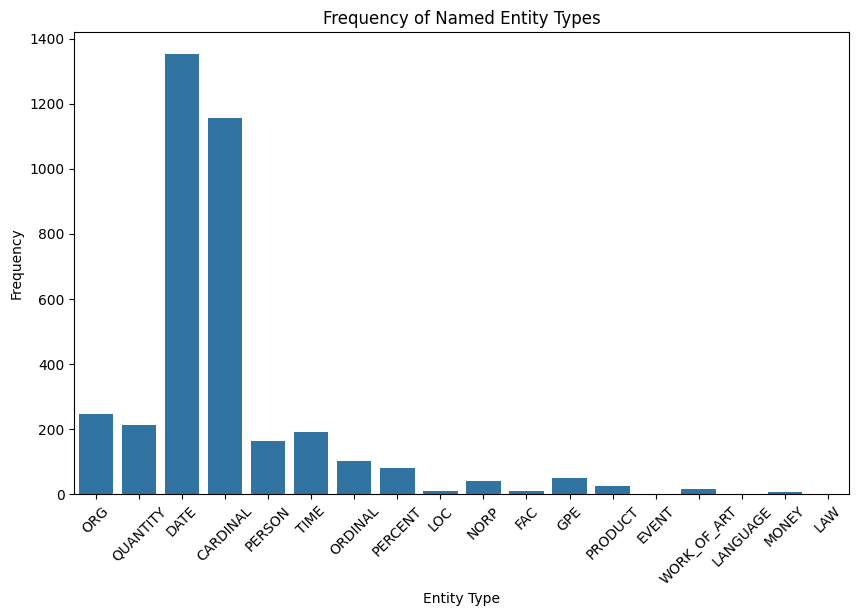

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Define a function to perform NER and extract entity labels
def extract_entity_labels(text):
    # Process the text using spaCy
    doc = nlp(text)
    # Extract entity labels
    return [ent.label_ for ent in doc.ents]

# Apply the NER function to the column containing text and aggregate all labels
all_labels = []
df['selftext'].apply(lambda x: all_labels.extend(extract_entity_labels(str(x))))

# Count the frequency of each entity label
label_counts = Counter(all_labels)

# Convert the counts to a pandas DataFrame for plotting
label_df = pd.DataFrame(label_counts.items(), columns=['Entity', 'Count'])

# Plot the frequency of entity labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Entity', y='Count', data=label_df)
plt.title('Frequency of Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Function to clean and tokenize text
def clean_and_tokenize(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

# Function to classify sentiment and collect words
def classify_and_collect_words(text):
    tokens = clean_and_tokenize(text)
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return ('positive', tokens)
    elif sentiment['compound'] < -0.05:
        return ('negative', tokens)
    return ('neutral', [])

# Apply the function to classify and collect words
df['sentiment_words'] = df['selftext'].apply(classify_and_collect_words)

# Separate positive and negative words
positive_words = []
negative_words = []

for sentiment, words in df['sentiment_words']:
    if sentiment == 'positive':
        positive_words.extend(words)
    elif sentiment == 'negative':
        negative_words.extend(words)

# Count word frequencies
positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# Get the most common words
top_positive = positive_counts.most_common(10)
top_negative = negative_counts.most_common(10)

# Convert to DataFrame for plotting
positive_df = pd.DataFrame(top_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(top_negative, columns=['Word', 'Frequency'])

# Plotting the top positive words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=positive_df, palette='viridis')
plt.title('Top 10 Positive Words')
plt.show()

# Plotting the top negative words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=negative_df, palette='magma')
plt.title('Top 10 Negative Words')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Function to clean and tokenize text, handling non-string values
def clean_and_tokenize(text):
    if not isinstance(text, str): # Check if text is a string
        return [] # Return an empty list if it's not
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

# Function to classify sentiment and collect words
def classify_and_collect_words(text):
    tokens = clean_and_tokenize(text)
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return ('positive', tokens)
    elif sentiment['compound'] < -0.05:
        return ('negative', tokens)
    return ('neutral', [])

# Apply the function to classify and collect words
df['sentiment_words'] = df['selftext'].apply(classify_and_collect_words)

# Separate positive and negative words
positive_words = []
negative_words = []

for sentiment, words in df['sentiment_words']:
    if sentiment == 'positive':
        positive_words.extend(words)
    elif sentiment == 'negative':
        negative_words.extend(words)

# Count word frequencies
positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# Get the most common words
top_positive = positive_counts.most_common(10)
top_negative = negative_counts.most_common(10)

# Convert to DataFrame for plotting
positive_df = pd.DataFrame(top_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(top_negative, columns=['Word', 'Frequency'])

# Plotting the top positive words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=positive_df, palette='viridis')
plt.title('Top 10 Positive Words')
plt.show()

# Plotting the top negative words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=negative_df, palette='magma')
plt.title('Top 10 Negative Words')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: 'float' object has no attribute 'encode'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Function to clean and tokenize text, handling non-string values
def clean_and_tokenize(text):
    if not isinstance(text, str): # Check if text is a string
        return [] # Return an empty list if it's not
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

# Function to classify sentiment and collect words, handling non-string values
def classify_and_collect_words(text):
    if not isinstance(text, str): # Handle non-string values
        return ('neutral', [])
    tokens = clean_and_tokenize(text)
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return ('positive', tokens)
    elif sentiment['compound'] < -0.05:
        return ('negative', tokens)
    return ('neutral', []) # Return neutral for non-string or neutral sentiment

# Apply the function to classify and collect words
df['sentiment_words'] = df['selftext'].apply(classify_and_collect_words)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-49-322fb9a42555>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=positive_df, palette='viridis')


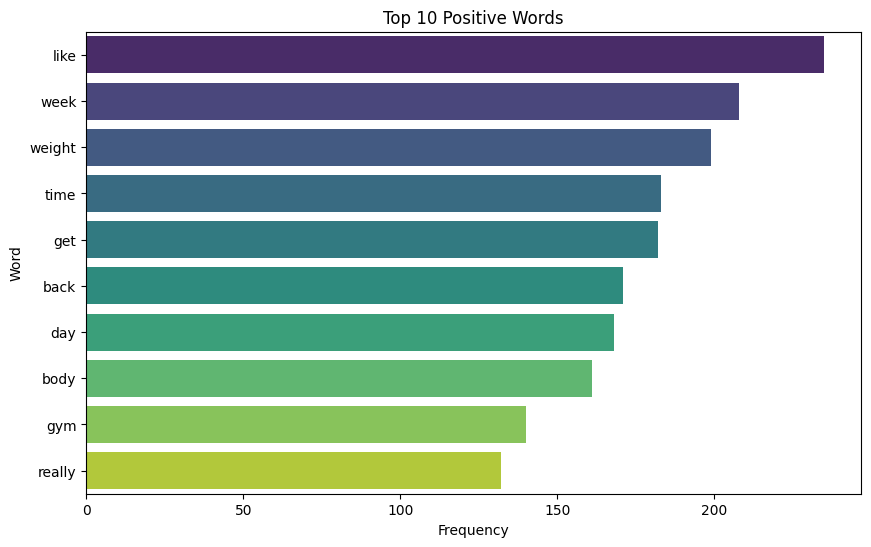

<ipython-input-49-322fb9a42555>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=negative_df, palette='magma')


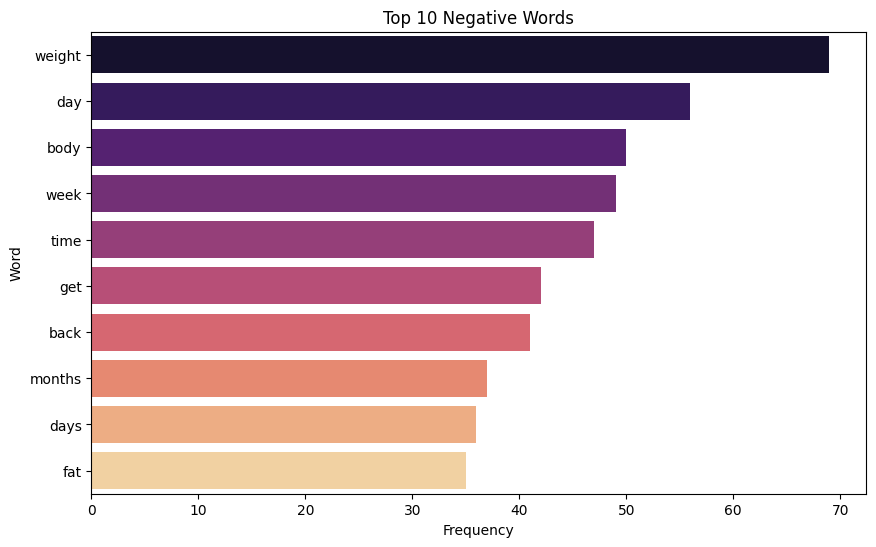

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/dhruvi_dataset.csv")

# Function to clean and tokenize text, handling non-string values
def clean_and_tokenize(text):
    if not isinstance(text, str): # Check if text is a string
        return [] # Return an empty list if it's not
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

# Function to classify sentiment and collect words, handling non-string values
def classify_and_collect_words(text):
    if not isinstance(text, str): # Handle non-string values
        return ('neutral', [])
    tokens = clean_and_tokenize(text)
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return ('positive', tokens)
    elif sentiment['compound'] < -0.05:
        return ('negative', tokens)
    return ('neutral', []) # Return neutral for non-string or neutral sentiment

# Apply the function to classify and collect words
df['sentiment_words'] = df['selftext'].apply(classify_and_collect_words)

# Separate positive and negative words
positive_words = []
negative_words = []

for sentiment, words in df['sentiment_words']:
    if sentiment == 'positive':
        positive_words.extend(words)
    elif sentiment == 'negative':
        negative_words.extend(words)

# Count word frequencies
positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# Get the most common words
top_positive = positive_counts.most_common(10)
top_negative = negative_counts.most_common(10)

# Convert to DataFrame for plotting
positive_df = pd.DataFrame(top_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(top_negative, columns=['Word', 'Frequency'])

# Plotting the top positive words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=positive_df, palette='viridis')
plt.title('Top 10 Positive Words')
plt.show()

# Plotting the top negative words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=negative_df, palette='magma')
plt.title('Top 10 Negative Words')
plt.show()

   upvote_ratio       id            author  num_comments  \
0          0.94  1aq1liy    empyreandreams             0   
1          0.97  1czmuou    empyreandreams             8   
2          1.00  1f0dnyc  Life_Chemist9642             0   
3          1.00  1f0d6t9      BeVanderhill             0   
4          1.00  1f0epqi            hcconn             2   

                                               title  \
0  /r/Exercise Beginners Guide &amp; Instructiona...   
1  Dancing is a great way to exercise. THIS is th...   
2                                            Sprints   
3                                        R/exercise    
4              Building muscle after being bedbound?   

                                            selftext     emotion  
0  /r/exercise beginners guide &amp; instructiona...     neutral  
1  dancing is a great way to exercise. this is th...  admiration  
2  so my current cardio routine is 3 days a week ...   curiosity  
3  what upper body strength exerci

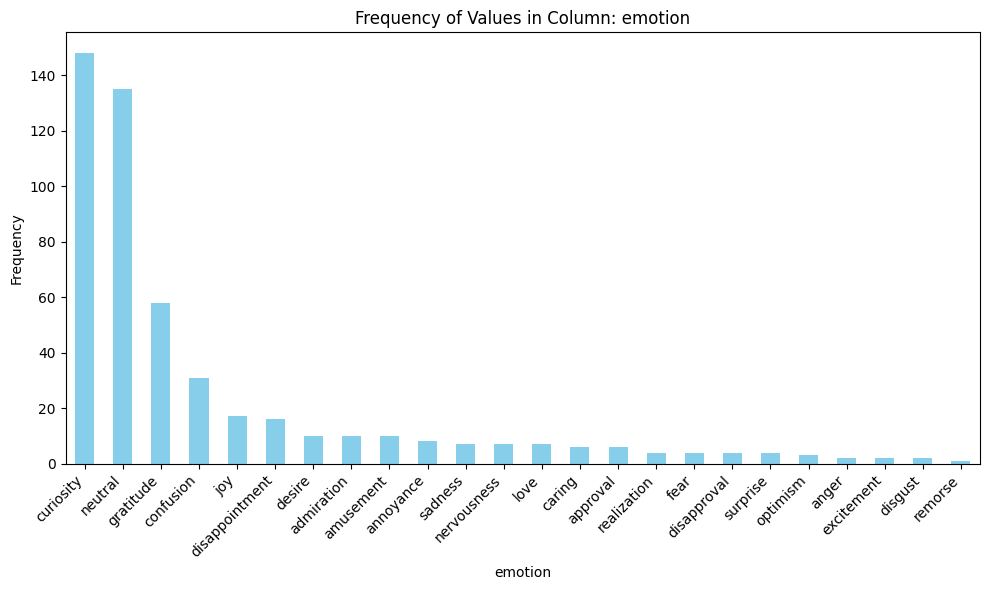

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/processed_emotions2.csv')  # Replace 'your_file.csv' with your actual CSV file name

# Inspect the DataFrame to understand its structure
print(df.head())

# Specify the column for which you want to plot the frequency
column_name = 'emotion'  # Replace 'your_column_name' with the actual column name

# Calculate the frequency of each unique value in the specified column
frequency = df[column_name].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title(f'Frequency of Values in Column: {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


   upvote_ratio       id          author  num_comments  \
0          0.99   x6o2qp       Dharmsara            12   
1          0.75  1f0m3m0  Other-Stuff874            14   
2          0.77  1f0jrw8      IM_HODLING            24   
3          0.91  1f0cq8m      Ok_Row8867            18   
4          1.00  1f0i93d      Notbefore6             4   

                                               title  \
0           National Suicide Prevention Week -- 2022   
1             F(36) reassurance needed - flabby arm    
2  How long of working out and eating healthy doe...   
3        Maintaining Muscle Mass At 40 (and beyond)    
4  I have Youtube, a yoga mat, weights up to 15 l...   

                                            selftext    emotion  
0           national suicide prevention week -- 2022    neutral  
1  hi all \n\ni’m 36 f and at the start of my men...  curiosity  
2                            male, 20lbs overweight,    neutral  
3  stats: 40/f\n\nhistory: always been quite thin.

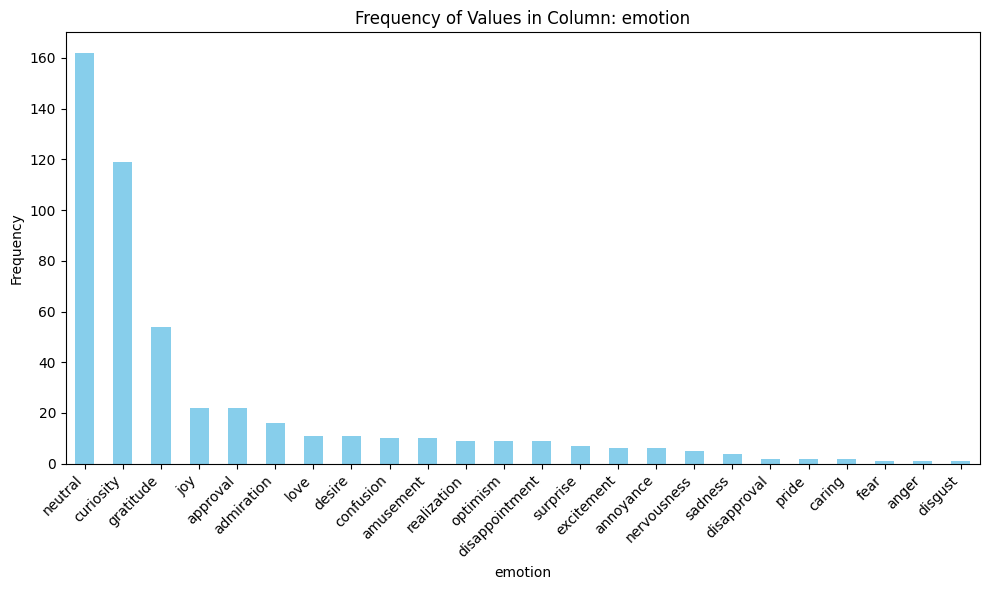

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/processed_emotions_d.csv')  # Replace 'your_file.csv' with your actual CSV file name

# Inspect the DataFrame to understand its structure
print(df.head())

# Specify the column for which you want to plot the frequency
column_name = 'emotion'  # Replace 'your_column_name' with the actual column name

# Calculate the frequency of each unique value in the specified column
frequency = df[column_name].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title(f'Frequency of Values in Column: {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('/content/processed_emotions_d.csv')
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(dtm)

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd  # Import the pandas library and assign it the alias 'pd'
df = pd.read_csv('/content/processed_emotions_d.csv')
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(dtm)

FileNotFoundError: [Errno 2] No such file or directory: '/content/processed_emotions_d.csv'